In [3]:
!pwd

/Users/alexkim/Documents/GitHub/cakd_LP/WorkSpace/Kim


# Table of Contents

In [83]:
import pandas as pd
import numpy as np
import os
import pickle

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 파일, 변수 리스트

- 경쟁사이용: competitor
- 고객DOMO: demo
- 구매상품 TR: purprd
- 멤머십여부: member
- 상품분류: prodcl
- 채널이용: channel
- 분류:
- 분류로직:

In [3]:
file_list = os.listdir('../../data')
sorted(file_list)

['.DS_Store',
 '경쟁사이용.txt',
 '고객DEMO.txt',
 '구매상품TR.txt',
 '멤버십여부.txt',
 '분류.docx',
 '분류.txt',
 '분류로직.csv',
 '분류로직.xlsx',
 '상품분류.txt',
 '채널이용.txt']

## 1. 경쟁사이용

In [4]:
# 경쟁사이용
competitor = pd.read_csv('../../data/경쟁사이용.txt', encoding='cp949')
competitor

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


### competitor.고객번호.unique()

In [5]:
sorted(competitor.고객번호.unique())
# 1 ~ 19377
len(competitor.고객번호.unique())
# 5881

5881

### competitor.제휴사.unique()

In [6]:
sorted(competitor.제휴사.unique())
# ['A', 'B', 'C', 'D']

['A', 'B', 'C', 'D']

### competitor.경쟁사.unique()

In [7]:
sorted(competitor.경쟁사.unique())
# ['A01', 'A02', 'B01', 'B02', 'C01', 'C02', 'C03', 'D01', 'D02']

['A01', 'A02', 'B01', 'B02', 'C01', 'C02', 'C03', 'D01', 'D02']

### competitor.이용년월.unique()

In [8]:
sorted(competitor.이용년월.unique())
# [201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512]

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512]

## 2. 고객DEMO

In [6]:
# 고객DEMO
demo = pd.read_csv('../../data/고객DEMO.txt', encoding='cp949')
demo.head()

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0


### demo.고객번호.unique()

In [10]:
sorted(demo.고객번호.unique())
# 1~19383
len(sorted(demo.고객번호.unique()))
# len : 19383

19383

### demo.성별.unique()

In [11]:
demo.성별.unique()
# ['M', 'F']

array(['M', 'F'], dtype=object)

### demo.연령대.unique()

In [12]:
sorted(demo.연령대.unique())
# ['19세이하', '20세~24세', '25세~29세', '30세~34세', '35세~39세',
#  '40세~44세', '45세~49세', '50세~54세', '55세~59세', '60세이상']

['19세이하',
 '20세~24세',
 '25세~29세',
 '30세~34세',
 '35세~39세',
 '40세~44세',
 '45세~49세',
 '50세~54세',
 '55세~59세',
 '60세이상']

### demo.거주지역.unique())
- 신 우편변오 앞 세 자리

In [13]:
demo.거주지역.unique()

array([ 60., 100.,  33.,  16., 240.,  36.,  10.,  24.,  43., 210., 460.,
        55.,  nan,  47.,  39., 440.,  87.,  65.,  13.,  49., 360.,  69.,
       410., 340., 500.,  72., 610.,  45.,  75.,  82.,  30.,  79.,  27.,
        52., 270., 540., 310.,  20., 570., 300.,  85., 630.])

In [14]:
sorted(demo.거주지역.unique())
# [10.0, 13.0, 16.0, 20.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0,
#  43.0, 45.0, 47.0, 49.0, 52.0, 55.0, 60.0, 65.0, 69.0, 72.0,
#  75.0, 79.0, 82.0, 85.0, 87.0, 100.0, 210.0, 240.0, 270.0, 300.0,
#  310.0, 340.0, 360.0, 410.0, 440.0, 460.0, nan, 500.0, 540.0, 570.0,
#  610.0, 630.0]
len(sorted(demo.거주지역.unique()))
# len : 42

42

#### nan 값 제거

In [15]:
demo_ = demo.거주지역.unique()
# np.where(demo_== 'nan')
demo_ = np.delete(demo_, 12)
# demo_ = sorted([int(x) for x in demo_])
demo_

array([ 60., 100.,  33.,  16., 240.,  36.,  10.,  24.,  43., 210., 460.,
        55.,  47.,  39., 440.,  87.,  65.,  13.,  49., 360.,  69., 410.,
       340., 500.,  72., 610.,  45.,  75.,  82.,  30.,  79.,  27.,  52.,
       270., 540., 310.,  20., 570., 300.,  85., 630.])

#### area_code 맵핑

In [7]:
 area_code = {10. : '서울특별시 강북구',
              13. : '서울특별시 도봉구',
              16. : '서울특별시 노원구',
              20. : '서울특별시 중랑구',
              24. : '서울특별시 동대문구',
              27. : '서울특별시 성북구',
              30. : '서울특별시 종로구',
              33. : '서울특별시 은평구',
              36. : '서울특별시 서대문구',
              39. : '서울특별시 마포구',
              43. : '서울특별시 용산구',
              45. : '서울특별시 중구',
              47. : '서울특별시 성동구',
              49. : '서울특별시 광진구',
              52. : '서울특별시 강동구',
              55. : '서울특별시 송파구',
              60. : '서울특별시 강남구',
              65. : '서울특별시 서초구',
              69. : '서울특별시 동작구',
              72. : '서울특별시 영등포구',
              75. : '서울특별시 강서구',
              79. : '서울특별시 양천구',
              82. : '서울특별시 구로구',
              85. : '서울특별시 금천구',
              87. : '서울특별시 관악구',
              100. : '경기도',
              210. : '인천광역시',
              240. : '강원도',
              270. : '충청북도',
              300. : '세종특별자치시',
              310. : '충청남도',
              340. : '대전광역시',
              360. : '경상북도',
              410. : '대구광역시',
              440. : '울산광역시',
              460. : '부산광역시',
              500. : '경상남도',
              540. : '전라북도',
              570. : '전라남도',
              610. : '광주광역시',
              630. : '제주특별자치도'
             }

In [8]:
# demo_area = demo['거주지역'].map(lambda x:area_code[float(x)])
demo_area = demo.replace({'거주지역':area_code})
demo_area.head()

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,서울특별시 강남구
1,2,M,60세이상,경기도
2,3,M,60세이상,서울특별시 은평구
3,4,F,60세이상,서울특별시 노원구
4,5,M,60세이상,경기도


In [9]:
demo_area.isnull().sum()

고객번호      0
성별        0
연령대       0
거주지역    178
dtype: int64

## 3. 구매상품TR

In [10]:
# 구매상품TR
# purprd = pd.read_csv('../../data/구매상품TR.txt', encoding='cp949')
# purprd.to_pickle('구매상품TR.pkl')
purprd=pd.read_pickle('구매상품TR.pkl')
purprd.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120


### 제휴사 별 구매 db

#### A사

In [19]:
purprd_A = purprd[purprd.제휴사=='A']
print(len(purprd_A))
purprd_A.head()

5770318


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
2479,A,2757986,1,101,A010101,15148,10,20140920,20,1000
2480,A,2757986,1,106,A010608,15148,10,20140920,20,4100
2481,A,2757987,1,104,A010402,400,10,20140920,12,5000
2482,A,2757987,1,107,A010705,400,10,20140920,12,10200
2483,A,2757988,1,101,A010101,2043,10,20140920,13,3950


##### A사에서 가장 많이 판매된 소분류 코드

In [20]:
purprd[purprd.제휴사=='A'].소분류코드.value_counts()

A010401    215089
A010302    212609
A010403    184710
A010402    183202
A010404    171691
            ...  
A090310         1
A040304         1
A020708         1
A060144         1
A060165         1
Name: 소분류코드, Length: 630, dtype: int64

#### B사

In [21]:
purprd_B = purprd[purprd.제휴사=='B']
print(len(purprd_B))
purprd_B.head()

13338074


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120


#### C사

In [22]:
purprd_C = purprd[purprd.제휴사=='C']
print(len(purprd_C))
purprd_C.head()

9379236


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
1771,C,10805593,3,305,C030501,5836,299,20140515,18,1490
1772,C,10805593,6,604,C060401,5836,299,20140515,18,1290
1773,C,10805594,16,1602,C160201,5836,299,20140515,18,11900
1774,C,10805595,5,502,C050209,5836,299,20140515,18,9836
1775,C,10805596,5,502,C050211,11348,299,20140515,18,22767


#### D사

In [23]:
purprd_D = purprd[purprd.제휴사=='D']
print(len(purprd_D))
purprd_D.head()

105402


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
2833,D,176059,4,401,D040109,14930,3,20140127,23,5500
2834,D,176060,1,104,D010401,14930,3,20140127,23,6500
2835,D,176061,1,104,D010401,9088,3,20140127,18,8000
2836,D,176062,4,401,D040104,1766,3,20140127,13,4000
2837,D,176062,4,401,D040109,1766,3,20140127,13,2000


#### 제휴사별 평균 구매금액

In [24]:
purprd.groupby('제휴사').구매금액.mean()

제휴사
A    89222.317389
B     8338.661675
C     5337.425233
D     8494.673194
Name: 구매금액, dtype: float64

#### 제휴사별 합계 구매금액

In [25]:
purprd.groupby('제휴사').구매금액.sum()

제휴사
A    514841144030
B    111221686478
C     50060970889
D       895355544
Name: 구매금액, dtype: int64

## 4. 멤버십여부

In [11]:
# 멤버심 여부
member = pd.read_csv('../../data/멤버십여부.txt', encoding='cp949')
member.head()

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411


### member.고객번호.unique()

In [27]:
sorted(member.고객번호.unique())
# 11 ~ 19383
len(sorted(member.고객번호.unique()))
# 6498

6498

### member.멤버십명.unique()

In [28]:
sorted(member.멤버십명.unique())
# ['다둥이', '더영', '롭스', '하이마트']

['다둥이', '더영', '롭스', '하이마트']

### member.가입년월.unique()

In [29]:
sorted(member.가입년월.unique())
# [201210, 201211, 201212,
# 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
# 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412,
# 201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512]

[201210,
 201211,
 201212,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201401,
 201402,
 201403,
 201404,
 201405,
 201406,
 201407,
 201408,
 201409,
 201410,
 201411,
 201412,
 201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512]

### member.멤버십명.unique()

In [30]:
sorted(member.멤버십명.unique())
# ['다둥이', '더영', '롭스', '하이마트']

['다둥이', '더영', '롭스', '하이마트']

## 5. 상품분류

In [10]:
# 상품분류
prodcl = pd.read_csv('../../data/상품분류.txt', encoding='cp949')
prodcl.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품


### prodcl.제휴사.unique()

In [32]:
sorted(prodcl.제휴사.unique())
# ['A', 'B', 'C', 'D']

['A', 'B', 'C', 'D']

### prodcl.대분류코드.unique()

In [33]:
len(sorted(prodcl.대분류코드.unique()))
# 1 ~ 92
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
#  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
#  41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
#  61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
#  81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]

92

#### A사 대분류코드: 9

In [34]:
print(len(prodcl[prodcl.제휴사=='A'].대분류코드.unique()))
print(prodcl[prodcl.제휴사=='A'].대분류코드.unique())

9
[1 2 3 4 5 6 7 8 9]


#### B사 대분류코드: 92

In [35]:
print(len(prodcl[prodcl.제휴사=='B'].대분류코드.unique()))
print(prodcl[prodcl.제휴사=='B'].대분류코드.unique())

92
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]


#### C사 대분류코드: 17

In [36]:
print(len(prodcl[prodcl.제휴사=='C'].대분류코드.unique()))
print(prodcl[prodcl.제휴사=='C'].대분류코드.unique())

17
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


#### D사 대분류코드: 8

In [37]:
print(prodcl[prodcl.제휴사=='D'].대분류코드.unique())
len(prodcl[prodcl.제휴사=='D'].대분류코드.unique())

[1 2 3 4 5 6 7 8]


8

### prodcl.중분류코드.unique()

In [38]:
sorted(prodcl.중분류코드.unique())

len(sorted(prodcl.중분류코드.unique()))
# len : 656

656

#### A사 중분류코드: 50

In [39]:
print(len(prodcl[prodcl.제휴사=='A'].중분류코드.unique()))
print(prodcl[prodcl.제휴사=='A'].중분류코드.unique())

50
[101 102 103 104 105 106 107 108 109 110 111 201 202 203 204 205 206 207
 301 402 403 404 405 406 407 408 409 410 501 502 503 504 505 506 601 602
 701 702 703 704 705 706 801 901 902 903 904 905 906 907]


#### B사 중분류코드: 626

In [40]:
print(len(prodcl[prodcl.제휴사=='B'].중분류코드.unique()))
print(prodcl[prodcl.제휴사=='B'].중분류코드.unique())

626
[ 101  102  103  201  202  301  302  401  402  403  404  501  502  503
  504  505  506  507  508  509  510  511  512  513  514  601  602  603
  604  605  606  607  608  609  610  611  701  702  703  704  705  706
  707  708  709  710  711  801  802  803  804  805  806  901  902  903
  904  905  906  907  908  909  910  911  912  913 1001 1002 1003 1004
 1005 1006 1007 1008 1009 1010 1101 1102 1103 1104 1105 1106 1107 1108
 1109 1110 1111 1112 1201 1202 1203 1204 1205 1206 1207 1208 1209 1301
 1302 1303 1304 1305 1306 1307 1308 1309 1310 1401 1402 1403 1404 1405
 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1501 1502 1503 1504
 1505 1506 1507 1508 1601 1602 1603 1604 1605 1701 1702 1703 1704 1705
 1706 1707 1708 1801 1802 1803 1804 1805 1806 1807 1808 1809 1810 1901
 1902 1903 1904 1905 1906 1907 1908 1909 2001 2002 2003 2004 2005 2006
 2007 2008 2101 2102 2103 2104 2105 2106 2107 2108 2201 2202 2203 2204
 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2301 2302 2303 2304
 2

#### C사 중분류코드: 98

In [41]:
print(len(prodcl[prodcl.제휴사=='C'].중분류코드.unique()))
print(prodcl[prodcl.제휴사=='C'].중분류코드.unique())

98
[ 101  102  103  104  105  201  202  203  301  302  303  304  305  306
  307  308  309  401  402  403  404  405  406  501  502  503  504  505
  506  601  602  603  604  605  701  702  703  704  801  802  803  901
  902 1001 1002 1003 1004 1101 1102 1103 1104 1105 1106 1107 1201 1202
 1203 1204 1205 1206 1301 1302 1303 1304 1305 1306 1307 1308 1401 1402
 1403 1404 1405 1406 1501 1502 1503 1504 1505 1506 1507 1508 1601 1602
 1603 1604 1605 1606 1607 1608 1609 1701 1702 1703 1704 1705 1706 1707]


#### D사 중분류코드: 33

In [42]:
print(len(prodcl[prodcl.제휴사=='D'].중분류코드.unique()))
print(prodcl[prodcl.제휴사=='D'].중분류코드.unique())

33
[101 102 103 104 105 106 201 202 203 204 205 301 302 303 401 402 501 502
 503 601 602 603 604 605 606 607 608 701 702 801 802 803 804]


### prodcl.소분류코드.unique()

In [43]:
sorted(prodcl.소분류코드.unique())

len(sorted(prodcl.소분류코드.unique()))
# len : 4386 

4386

####  A사 소분류코드: 630

In [44]:
print(len(prodcl[prodcl.제휴사=='A'].소분류코드.unique()))
print(prodcl[prodcl.제휴사=='A'].소분류코드.unique())

630
['A010101' 'A010102' 'A010103' 'A010104' 'A010105' 'A010106' 'A010201'
 'A010202' 'A010203' 'A010204' 'A010205' 'A010206' 'A010207' 'A010301'
 'A010302' 'A010303' 'A010304' 'A010305' 'A010306' 'A010401' 'A010402'
 'A010403' 'A010404' 'A010405' 'A010406' 'A010407' 'A010408' 'A010409'
 'A010410' 'A010411' 'A010412' 'A010413' 'A010414' 'A010501' 'A010502'
 'A010503' 'A010504' 'A010505' 'A010506' 'A010507' 'A010508' 'A010509'
 'A010510' 'A010511' 'A010512' 'A010514' 'A010515' 'A010516' 'A010517'
 'A010518' 'A010519' 'A010520' 'A010521' 'A010601' 'A010602' 'A010603'
 'A010604' 'A010605' 'A010606' 'A010607' 'A010608' 'A010609' 'A010610'
 'A010611' 'A010612' 'A010613' 'A010614' 'A010615' 'A010616' 'A010617'
 'A010618' 'A010619' 'A010620' 'A010621' 'A010622' 'A010623' 'A010624'
 'A010625' 'A010626' 'A010627' 'A010628' 'A010629' 'A010630' 'A010631'
 'A010632' 'A010633' 'A010634' 'A010635' 'A010636' 'A010637' 'A010638'
 'A010639' 'A010640' 'A010641' 'A010642' 'A010643' 'A010644' 'A010645'
 '

#### B사 소분류코드: 2624

In [45]:
print(len(prodcl[prodcl.제휴사=='B'].소분류코드.unique()))
print(prodcl[prodcl.제휴사=='B'].소분류코드.unique())

2624
['B010101' 'B010102' 'B010103' ... 'B920601' 'B920602' 'B920603']


#### C사 소분류코드: 987

In [46]:
print(len(prodcl[prodcl.제휴사=='C'].소분류코드.unique()))
print(prodcl[prodcl.제휴사=='C'].소분류코드.unique())


987
['C010101' 'C010102' 'C010103' 'C010104' 'C010105' 'C010106' 'C010107'
 'C010108' 'C010109' 'C010110' 'C010111' 'C010112' 'C010113' 'C010114'
 'C010115' 'C010116' 'C010117' 'C010118' 'C010119' 'C010120' 'C010121'
 'C010122' 'C010201' 'C010202' 'C010203' 'C010204' 'C010205' 'C010206'
 'C010207' 'C010208' 'C010209' 'C010210' 'C010211' 'C010212' 'C010213'
 'C010214' 'C010215' 'C010216' 'C010301' 'C010302' 'C010303' 'C010304'
 'C010401' 'C010402' 'C010403' 'C010501' 'C010502' 'C010503' 'C010504'
 'C010505' 'C010506' 'C010507' 'C010508' 'C010509' 'C020101' 'C020102'
 'C020103' 'C020201' 'C020202' 'C020203' 'C020204' 'C020205' 'C020206'
 'C020207' 'C020208' 'C020301' 'C020302' 'C030101' 'C030102' 'C030103'
 'C030104' 'C030105' 'C030106' 'C030107' 'C030108' 'C030109' 'C030110'
 'C030111' 'C030201' 'C030202' 'C030203' 'C030204' 'C030205' 'C030206'
 'C030207' 'C030208' 'C030209' 'C030210' 'C030301' 'C030302' 'C030303'
 'C030304' 'C030305' 'C030306' 'C030307' 'C030308' 'C030309' 'C030310'
 '

#### D사 소분류코드: 145

In [47]:
print(len(prodcl[prodcl.제휴사=='D'].소분류코드.unique()))
print(prodcl[prodcl.제휴사=='D'].소분류코드.unique())

145
['D010101' 'D010102' 'D010103' 'D010104' 'D010105' 'D010106' 'D010107'
 'D010201' 'D010202' 'D010301' 'D010401' 'D010501' 'D010502' 'D010503'
 'D010504' 'D010505' 'D010506' 'D010507' 'D010601' 'D010602' 'D010603'
 'D010604' 'D020101' 'D020102' 'D020103' 'D020104' 'D020105' 'D020106'
 'D020107' 'D020108' 'D020201' 'D020202' 'D020203' 'D020204' 'D020205'
 'D020206' 'D020207' 'D020301' 'D020302' 'D020303' 'D020304' 'D020401'
 'D020402' 'D020403' 'D020404' 'D020405' 'D020406' 'D020501' 'D020502'
 'D020503' 'D020504' 'D030101' 'D030102' 'D030103' 'D030201' 'D030202'
 'D030203' 'D030204' 'D030205' 'D030206' 'D030207' 'D030301' 'D030302'
 'D030303' 'D030304' 'D030305' 'D030306' 'D040101' 'D040102' 'D040103'
 'D040104' 'D040105' 'D040106' 'D040107' 'D040108' 'D040109' 'D040110'
 'D040111' 'D040112' 'D040201' 'D040202' 'D040203' 'D040204' 'D040205'
 'D040206' 'D040207' 'D040208' 'D040209' 'D040210' 'D040211' 'D040212'
 'D040213' 'D040214' 'D040215' 'D040216' 'D040217' 'D040218' 'D040219'
 '

### prodcl.중분류명.unique()

In [48]:
sorted(prodcl.중분류명.unique())

# len(sorted(prodcl.중분류명.unique()))
# len : 717


['BABY/INFANT',
 'BOYS 1',
 'BOYS 2',
 'DIY욕실용품',
 'DVD',
 'EDUCATION 1',
 'EDUCATION 2',
 'Fast Food',
 'GIRLS',
 'H&B선물세트',
 'LOCAL김치채소',
 'LOCAL잎채소',
 'MP3/PMP',
 'NAVI/하이패스',
 'NB구두',
 'PC',
 'SPORTS/OUTDOOR',
 'TRAVEL',
 'TV',
 'VIDEOGAME',
 '가공건식품',
 '가공란',
 '가공분말류',
 '가공식품',
 '가공양곡',
 '가공우유',
 '가구',
 '가구/인테리어샵',
 '가루',
 '가방',
 '가방브랜드',
 '가습기',
 '가정잡화',
 '간식',
 '간식용과자',
 '간식조리',
 '간편간식',
 '간편요리',
 '간편조리',
 '간편조리생선',
 '간편조리식품',
 '간편조리행사',
 '간편채소',
 '감',
 '감귤',
 '감미료',
 '개인위생용품',
 '건강가전',
 '건강기능식품',
 '건강디지털기기',
 '건강선물세트',
 '건강식품',
 '건과',
 '건과일',
 '건면',
 '건어가공',
 '건어류',
 '건오징어',
 '건전지',
 '견과류',
 '계란',
 '계란류',
 '계절팩',
 '고등어/삼치',
 '고양이용품',
 '골프',
 '골프용품',
 '공구',
 '공기청정기',
 '과실과일',
 '과자',
 '과채과일',
 '과채류',
 '과채음료',
 '교복',
 '교육',
 '교육보조재',
 '교환/보수용품',
 '구강용품',
 '구강케어',
 '구기용품',
 '구두',
 '구색과일',
 '구이',
 '구이찜조리',
 '국내산계육',
 '국내산돈육',
 '국내산우육',
 '국내화장품',
 '국산게/갈치',
 '국산과일',
 '국산과일선물세트',
 '굴비',
 '굴비/반건생선선물세트',
 '규격RTC',
 '규격생선선물세트',
 '균일가',
 '그릇/수저',
 '근채류',
 '기기',
 '기능성건강',
 '기능성음료',
 '기능헤어케어

#### A사 중분류명: 49

In [49]:
print(len(prodcl[prodcl.제휴사=='A'].중분류명.unique()))
print(prodcl[prodcl.제휴사=='A'].중분류명.unique())

49
['일용잡화' '육류' '축산가공' '농산물' '수산품' '가공식품' '젓갈/반찬' '건강식품' '주류' '차/커피' '기타'
 '섬유잡화' '액세서리' '화장품' '보석' '준보석/시계' '피혁잡화' '구두' '아동' '캐주얼' '커리어' '트래디셔널'
 '시티웨어' '란제리/내의' '블라우스' '기타의류' '디자이너' '모피/피혁' '남성정장' '남성캐주얼' '교복' '셔츠'
 '남성 트랜디' '스포츠' '골프용품' '대형가전' '소형가전' '통신/컴퓨터' '악기' '전자/전기' '주방가전' '명품'
 '주방용품' '문구/팬시' '생활잡화' '식기' '가구' '침구/수예' '웨딩']


#### B사 중분류명: 579

In [50]:
print(len(prodcl[prodcl.제휴사=='B'].중분류명.unique()))
print(prodcl[prodcl.제휴사=='B'].중분류명.unique())

579
['열매채소' '버섯' '온라인버섯/열매채소' '조리반찬' '시즌반찬' '포장젓갈' '포장반찬' '양곡' '잡곡류' '즉석도정미'
 '가공양곡' '잎채소' '뿌리채소' '버섯류' '샐러드채소' '약초' '양념류' '식자재' '친환경채소' '김치채소'
 '온라인잎/샐러드채소' 'LOCAL잎채소' 'LOCAL김치채소' '샐러드/간편채소' '대중선어' '냉동수산물' '생선선물세트'
 '고등어/삼치' '대구' '도미/민어' '기타구색생선' '꽁치/가자미' '오징어' '조기/명태' '국산게/갈치' '선물세트'
 '즉석구이안주' '마른안주' '멸치건명태' '해조류' '특산물' '건오징어' '조미오징어' '육포' '쥐치포' '마른안주선물세트'
 'Fast Food' '편의시설' '레스토랑' '카페' '판매시설' '주유소' '브랜드조리' '베이커리' '구이' '튀김' '밥류'
 '구이찜조리' '반찬류' '대용식' '이벤트조리' '간식조리' '간편조리' '튀김조리' '피자' '냉장음료' '데일리처분'
 '흰우유' '가공우유' '요구르트' '유제품' '브랜드빵' '치즈' '디저트' '유가공' '조미료' '소스류' '장류' '식용유지'
 '조미선물세트' '가루' '향신료' '액상조미료' '복합조미료' '소금/설탕류' '수입조미' '간편조리식품' '라면' '면류'
 '분유' '잼' '통조림' '인스턴트선물세트' '이유식/유아간식' '두유' '커피' '차' '건강식품' '담배' '인스턴트커피'
 '원두커피' '커피선물세트' '시즌차' '차선물세트' '꿀' '스낵' '비스켓' '파이' '시리얼' '캔디' '초콜릿' '껌'
 '안주' '한과' '프리미엄과자' '간식용과자' '수입과자' '종합과자' '전통과자' '생수' '과채음료' '탄산음료' '이온음료'
 '커피차음료' '기능성음료' '수입음료' '소주' '맥주' '와인' '전통주' '양주' '세탁세제' '주거세제' '주방세제'
 '섬유유연제' '표백제' '살충제' '탈취제' '제습제' '기저귀' '화장지' '생리대' '유아세제

#### C사 중분류명: 98

In [51]:
print(len(prodcl[prodcl.제휴사=='C'].중분류명.unique()))
print(prodcl[prodcl.제휴사=='C'].중분류명.unique())

98
['국산과일' '수입과일' '냉동과일' '건과일' '견과류' '양곡' '잡곡' '선식류' '엽채류' '과채류' '근채류' '두채류'
 '김치채소류' '버섯류' '양채류' '나물류' '계란류' '선어류' '선어가공' '건어류' '건어가공' '해물류' '기타수산'
 '국내산우육' '국내산돈육' '국내산계육' '수입우육' '수입돈육' '기타축산' '반찬류' '간편간식' '식사류' '베이커리'
 '기타조리식품' '우유' '발효유' '치즈버터' '냉장음료' '냉장농산' '냉장수산' '냉장축산' '아이스크림' '만두'
 '냉장간식MS' '냉장식사MS' '냉장기타MS' '냉동MS' '생수' '탄산음료' '과채음료' '커피음료' '차음료' '기능성음료'
 '두유' '소주' '맥주' '와인' '양주' '전통주' '기타음주류' '병통조림' '커피류' '담배' '분유' '차류' '건강식품'
 '즉석식품' '가공건식품' '장류' '식용유' '조미료' '케첩마요네즈' '감미료' '가공분말류' '라면' '건면' '쿠키케이크'
 '스낵' '캔디껌류' '초콜렛' '전통과자' '씨리얼' '세탁세제' '화장지' '주방주거세제' '유아용품' '화장품' '두발용품'
 '생리용품' '구강용품' '위생용품' '주방용품' '청소욕실용품' '전기전자' '의류잡화' '레저취미' '문화용품' '가정잡화']


#### D사 중분류명: 33

In [52]:
print(len(prodcl[prodcl.제휴사=='D'].중분류명.unique()))
print(prodcl[prodcl.제휴사=='D'].중분류명.unique())

33
['베이직케어' '선케어' '클렌징' '집중케어' '남성케어' '베이비케어' '헤어케어' '바디케어' '핸드/풋케어' '구강케어'
 '여성용품' '피트니스' '건강기능식품' '일반의약외품' '과자' '음료' '화장지/티슈' '방향/제습/탈취제' '기기'
 '미용소품' '양말류' '우산/양산류' '파티/팬시용품' '전기용품' '안전용품' '여행용품' '계절팩' '여성' '남성'
 '베이스메이크업' '아이메이크업' '립메이크업' '네일메이크업']


### prodcl.소분류명.unique()

In [53]:
sorted(prodcl.소분류명.unique())
# len : 3520

['14K',
 '2단우산',
 '3단우산',
 '3분요리류',
 '4대 B/D',
 '5 ON THE GO',
 'ACC Bloom (1F)',
 'ACC Bloom (3F)',
 'AK골프',
 'ANDZ',
 'ARCHIV',
 'BB/파운데이션/컴팩트류',
 'BON',
 'Bag&Bag',
 'CJ팩토리샵',
 'DIY가전',
 'DIY소가구',
 'DIY완구',
 'DKNY',
 'DVD',
 'Digital Accessory',
 'EC(해외잡화)',
 'F/F기타',
 'FAST FOOD',
 'Fitness Square',
 'GAP감귤',
 'GR-8',
 'HMR',
 'IMZ프리미엄',
 'IT 게임기S/W',
 'JDX골프',
 'K2',
 'K2플라이워크',
 'KHOS',
 'KKD',
 'Knit & Knot',
 'Knit & Knot(캐슬플라자)',
 'L.B',
 'L/C 아동복',
 'L/C 아웃도어',
 'L/C골프의류',
 'LED TV',
 'LED램프',
 'Last Scene',
 'Leg 5:3:2',
 'Local갓',
 'Local근대',
 'Local기타잎채소',
 'Local깻잎',
 'Local무우',
 'Local미나리',
 'Local배추',
 'Local부추',
 'Local상추',
 'Local시금치',
 'Local쌈채소',
 'Local쑥갓',
 'Local아욱',
 'Local양배추',
 'Local얼갈이',
 'Local열무',
 'MODIUM',
 'MP3',
 'MP3 外',
 'MTB자전거',
 'Maniz',
 'N.B',
 'N.B정장',
 'N/B 아동복',
 'N/B골프의류',
 'NB 돼지고기',
 'NB 여화',
 'NB구두',
 'NB돼지고기',
 'OA용품',
 'OUTDOOR+1',
 'PAT',
 'PB 계란',
 'PB 돼지고기',
 'PB 수입 소고기',
 'PB 수입소고기 선물세트',
 'PB 한우',
 'PB 한우 선물세트',
 'PB감',
 'PB감귤',
 '

#### A사 소분류명: 617

In [54]:
print(len(prodcl[prodcl.제휴사=='A'].소분류명.unique()))
print(prodcl[prodcl.제휴사=='A'].소분류명.unique())

617
['위생세제' '휴지류' '뷰티상품' '일용잡화' '세트상품' '단기행사' '우육' '돈육' '계육' '갈비세트' '정육세트'
 '수입육' '양념육' '햄' '유제품' '직매입' '화과자' '햄세트' '친환경올가' '청과' '채소' '유기농채소' '농산가공'
 '건과' '선식(가루류)' '곡물' '농산단기행사' '청과세트' '건과세트' '곶감/송이세트' '수삼/더덕세트' '친환경세트'
 '생선' '회' '건생선' '기타생선' '냉동식품' '냉동만두류' '굴비류' '멸치류' '안주류' '김류' '즉석구이김류'
 '건어물류' '건어물세트' '선어세트' '굴비세트' '안주세트' '기타건생선세트' '김세트' '멸치세트' '수산단기행사'
 '한식델리' '일식델리' '서양델리' '에스닉푸드' '중식델리' '초밥' '제과제빵' '일반가공식품' '특산물행사' '가공선물세트'
 '케익류' '양과자류' '전문베이커리' '떡' '한과' '한과(세트행사)' '양과(세트행사)' '반찬장류세트' '포숑'
 '수입단기행사' '기타베이커리' '즉석.스넥(매장)' '밥류' '면류' '패밀리레스토랑' '아이스크림' '커피숍' 'KKD'
 '푸드코트' '브랑제리' '브랜드샵' '엔젤리너스' '롯데리아' 'TGIF' '음료' '분식' '대형테넌트' '디저트카페' '양식'
 '일식' '한식' '중식' '패스트푸드' '식당가 한식' '식당가 중식' '식당가 일식' '식당가 양식' '식당가 커피숍'
 '식당가 아이스크림' '식당가 레스토랑' '생필(부대)' '스넥(부대)' '지방스넥(부대)' '델리(부대)' '레토르' '젓갈세트'
 '규격젓갈' '벌크젓갈' '규격김치' '벌크김치' '장류' '어묵' '가공행사' '즉석반찬' '건강식품(홍삼)' '건강식품'
 '건강식품(비타민)' '주류' '한차' '공병' '기타음료' '디저트류' '가공2단기행사' '원두커피' '수입식품'
 'PECK Restaurant' 'PECK Enoteca' 'PECK Fruits' 'PECK G&C' '팩토리샵' 'CJ

#### B사 소분류명: 2294

In [55]:
print(len(prodcl[prodcl.제휴사=='B'].소분류명.unique()))
print(prodcl[prodcl.제휴사=='B'].소분류명.unique())

2294
['가지' '고추' '구색 호박' ... '밤기타' '생율' '피밤']


#### C사 소분류명: 987

In [56]:
print(len(prodcl[prodcl.제휴사=='C'].소분류명.unique()))
print(prodcl[prodcl.제휴사=='C'].소분류명.unique())

987
['사과' '배' '감' '귤류' '유자/모과' '복숭아' '자두' '살구' '매실' '딸기' '포도' '무화과' '수박' '참외'
 '메론' '토마토' '방울토마토' '기타국산과일류' '사과선물세트' '배선물세트' '혼합과일선물세트' '기타과일선물세트'
 '블루베리' '수입포도' '레몬' '망고' '망고스틴' '바나나' '아보카도' '야자' '오렌지' '용과' '자몽' '체리'
 '키위' '파인애플' '기타수입과일' '간편과일' '냉동망고' '냉동베리류' '냉동홍시' '기타냉동과일류' '곶감' '기타건과일'
 '곶감선물세트' '밤' '땅콩' '호두' '잣' '피스타치오' '아몬드' '캐슈넛' '혼합견과' '기타견과류' '일반미'
 '기능성미' '즉석도정미' '보리' '현미' '찹쌀' '흑미' '콩' '조/수수' '혼합잡곡' '기타잡곡류' '미숫가루' '선식'
 '미나리' '부추' '상추' '시금치' '대파' '쪽파류' '쌈채소류' '쑥갓' '깻잎' '근대/아욱' '기타잎채소' '가지'
 '고추' '건고추' '오이' '옥수수' '파프리카/피망' '단호박' '애호박' '여주' '기타열매채소' '감자' '고구마' '당근'
 '생강' '연근' '우엉' '마' '기타뿌리채소' '마늘' '양파' '인삼류' '기타한방약재' '더덕선물세트' '수삼선물세트'
 '혼합채소선물세트' '한방약재류' '두부류' '연두부류' '묵류' '콩나물' '숙주나물' '무' '열무' '알타리무' '갓'
 '배추' '봄동' '얼갈이' '절임배추' '느타리버섯류' '새송이버섯류' '양송이버섯류' '송이버섯류' '팽이버섯류' '표고버섯류'
 '건버섯류' '모둠버섯' '기타버섯류' '버섯선물세트' '약용버섯류' '양배추' '미니양배추' '양상추' '브로콜리' '컬리플라워'
 '샐러드류' '기타양채류' '원예식물' '생나물류' '삶은나물류' '건나물류' '다시마' '매생이' '미역' '톳' '파래'
 '기타해초류' '일반계란' '가공계란' '일반메추리알' '가공메추리알' '가자미' '갈치' '고

#### D사 소분류명: 145

In [57]:
print(len(prodcl[prodcl.제휴사=='D'].소분류명.unique()))
print(prodcl[prodcl.제휴사=='D'].소분류명.unique())

145
['스킨/토너' '미스트' '에멀젼/로션' '에센스/세럼' '아이케어' '크림/밤/오일' '스킨케어세트' '선크림류'
 '태닝/애프터선케어' '페이셜클렌저' '페이셜팩류' '남성용면도기/날' '쉐이빙폼/젤' '클래식면도용품' '남성용클렌저'
 '남성용스킨케어류' '남성스킨케어세트' '남성용선크림/메이크업류' '유아용화장품' '기저귀크림/파우더' '유아용샴푸/바디워시'
 '유아목욕용품' '샴푸' '린스/컨디셔너' '트리트먼트/팩' '헤어에센스' '헤어스프레이' '헤어무스/젤' '헤어왁스' '염모제'
 '바디워시' '바디보습' '입욕제/스파제품' '바디케어세트' '바디슬리밍/리프팅' '제모용품' '데오도란트' '핸드워시/손세정제'
 '핸드로션/크림' '풋케어' '풋케어도구' '치약' '칫솔' '전동칫솔/칫솔모' '구강청정제' '기타구강관리용품' '치약/칫솔세트'
 '생리대' '탐폰' '팬티라이너' '여성세정제' '웨이트기구' '기타피트니스기구' '기타건강측정용품' '종합영양제' '일반비타민'
 '기타영양제' '운동보조식품' '다이어트보조식품' '미용보조식품' '건강보조식품세트' '안전상비의약외품' '콘돔' '건강마스크'
 '밴드류' '렌즈관리용품' '온/냉찜질용품' '기타견과류' '일반시리얼' '즉석스프' '기타레토르트' '일반껌' '하드캔디'
 '판초콜릿' '일반스낵' '쿠키' '파이' '바아이스크림' '컵아이스크림' '생수' '탄산수' '콜라' '혼합탄산' '스포츠음료'
 '비타민/에너지음료' '한방음료' '숙취해소음료' '기타기능성음료' '과일음료' '채소음료' '과채혼합음료' '일반차음료'
 '전통차음료' '커피음료' '일반두유' '믹스커피' '식수용차' '녹차/홍차' '허브/꽃차' '전통/한방차' '코코아' '아이스티'
 '롤티슈' '각티슈/미용티슈' '물티슈' '방향제' '제습제' '차량용방향/제취제' '향초' '디퓨저' '헤어드라이어'
 '헤어세팅기' '여성헤어액세서리' '기름종이' '메탈미용소도구' '속눈썹/쌍꺼풀' '메이크업브러쉬' '스폰지

## 6. 채널이용

In [13]:
# 채널이용
channel = pd.read_csv('../../data/채널이용.txt', encoding='cp949')
channel.head()

,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30


### channel.고객번호.unique()

In [59]:
sorted(channel.고객번호.unique())
# 7 ~ 19382
len(sorted(channel.고객번호.unique()))
# len : 6766

6766

### channel.제휴사.unique()

In [60]:
sorted(channel.제휴사.unique())
# ['A_MOBILE/APP', 'B_MOBILE/APP', 'B_ONLINEMALL', 'C_MOBILE/APP', 'C_ONLINEMALL', 'D_MOBILE/APP']

['A_MOBILE/APP',
 'B_MOBILE/APP',
 'B_ONLINEMALL',
 'C_MOBILE/APP',
 'C_ONLINEMALL',
 'D_MOBILE/APP']

### channel.이용횟수.unique()

In [61]:
print(sorted(channel.이용횟수.unique()))
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
#  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
#  41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
#  61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
#  81, 82, 83, 84, 85, 86, 87, 89, 91, 93, 96, 97, 98, 99, 100, 101, 103, 106, 109, 110,
#  111, 116, 118, 119, 120, 121, 122, 124, 129, 137, 142, 143, 165, 168, 183, 240]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 91, 93, 96, 97, 98, 99, 100, 101, 103, 106, 109, 110, 111, 116, 118, 119, 120, 121, 122, 124, 129, 137, 142, 143, 165, 168, 183, 240]


## 7. 분류

In [9]:
clf = pd.read_csv('../../data/분류.txt', encoding='cp949')
clf

,CAT,CATEGORY,TYPE
0,A01가공식품,식품,일용품
1,A01건강식품,식품,선매품
2,A01기타,멀티샵,일용품
3,A01농산물,식품,일용품
4,A01수산품,식품,일용품
...,...,...,...
801,D07여성,이미용,일용품
802,D08네일메이크업,이미용,일용품
803,D08립메이크업,이미용,일용품
804,D08베이스메이크업,이미용,일용품


## 8. 분류로직

In [14]:
clf_logic = pd.read_csv('../../data/분류로직.csv', encoding='cp949')
clf_logic

,CAT,CATEGORY,UPRICE,QTY,AVG,AVGVS,LEV
0,A01가공식품,식품,14650,1260715,7926,1.8,중가
1,A01건강식품,식품,139926,53366,7926,17.7,고가
2,A01기타,멀티샵,96379,649,96379,1.0,중가
3,A01농산물,식품,15090,820228,7926,1.9,중가
4,A01수산품,식품,30602,199657,7926,3.9,고가
...,...,...,...,...,...,...,...
801,D07여성,이미용,48304,400,54507,0.9,중가
802,D08네일메이크업,이미용,10981,824,54507,0.2,저가
803,D08립메이크업,이미용,17839,1925,54507,0.3,저가
804,D08베이스메이크업,이미용,25196,1371,54507,0.5,저가


In [64]:
clf_logic['CATEGORY'].unique()

array(['식품', '멀티샵', '잡화', '이미용', '아동', '의류', '속옷', '레저취미', '가전', '주방',
       '가구인테리어', '교육문화', '생활', '웨딩', '침구'], dtype=object)

In [65]:
# clf_logic[clf_logic['CATEGORY']=='식품']['CAT'].unique()

## 테이블 조인

### 거주지가 불분명한 고객들의 거주지 유추

In [10]:
# 거주지가 null 값인 고객데모 데이터에서 고객 번호를 추출
demo_nan=(demo_area[demo_area['거주지역'].isnull()]['고객번호']).values
demo_nan[:10]

array([  22,  516,  940,  952, 1084, 1108, 1268, 1439, 1941, 1983])

In [11]:
demo_area_sang = demo_area.copy()

In [12]:
aaa = purprd[['고객번호','점포코드']].merge(demo_area_sang, on='고객번호')
aaa.drop(['성별','연령대'],axis=1, inplace=True)

for i in aaa[aaa.거주지역.isnull()]['고객번호'].unique():
    b = aaa[aaa.고객번호==i].점포코드.value_counts().index[0]
    demo_area_sang.loc[(demo_area_sang.고객번호==i),'거주지역'] = aaa[aaa.점포코드==b].거주지역.value_counts().index[0]
demo_area_sang.isnull().sum()  

고객번호    0
성별      0
연령대     0
거주지역    0
dtype: int64

In [17]:
demo_area_sang['거주지역'].isnull().sum()

0

In [4]:
# demo_area_sang.to_pickle('demo_area.pkl')
demo_area_sang=pd.read_pickle('demo_area.pkl')

In [566]:
# jumpo: 모든 점포

# # 해당 점포를 방문한 이력이 있는 모든 고객들의 거주지역을 리스트에 담는다

# # 점포를 방문한 고객들의 거주지의 최빈값을 구함

# mode_jumpo_region={}
# for j in jumpo:
#     mode_region =[]
#     for i in sorted(purprd_prodcl[purprd_prodcl['점포코드']==j]['고객번호'].values):
#         mode_region.append(demo_area.loc[demo_area['고객번호']==i,'거주지역'].values[0])
#         most_common_region=Counter(mode_region).most_common(1)[0][0]

    
#     mode_jumpo_region[j]=most_common_region


In [13]:
# purprd_prodcl[purprd_prodcl['고객번호']==9295]['점포코드'].value_counts()
# nan_cus = []
# for cusno in demo_nan:
#     m_visted_jumpo=purprd_prodcl[purprd_prodcl['고객번호']==cusno]['점포코드'].value_counts().index[0]
#     m_visted_cus=purprd_prodcl[purprd_prodcl['점포코드']==m_visted_jumpo]['고객번호'].value_counts().index[0]
#     m_region=demo_area.loc[demo_area['고객번호']==m_visted_cus,'거주지역'].values[0]
#     if type(m_region)==str:
#         pass
#     else:
#         m_visted_cus=purprd_prodcl[purprd_prodcl['점포코드']==m_visted_jumpo]['고객번호'].value_counts().index[1]
#         m_region=demo_area.loc[demo_area['고객번호']==m_visted_cus,'거주지역'].values[0]
#         nan_cus.append(cusno)
#     demo_area.loc[demo_area['고객번호']==cusno,'거주지역'] = m_region
    

In [28]:
# for cusno in nan_cus:
#     print(cusno,demo_area[demo_area['고객번호']==cusno]['거주지역'].values[0],':',
#           demo_area_sang[demo_area_sang['고객번호']==cusno]['거주지역'].values[0])

In [14]:
# jumpo: 모든 점포

# 해당 점포를 방문한 이력이 있는 모든 고객들의 거주지역을 리스트에 담는다

# 점포를 방문한 고객들의 거주지의 최빈값을 구함

# mode_jumpo_region={}
# for j in purprd_prodcl['점포코드'].unique():
#     most_demo_num=purprd_prodcl[purprd_prodcl['점포코드']==j]['고객번호'].value_counts().index[0]
#     most_common_region=demo_area.loc[demo_area['고객번호']==most_demo_num,'거주지역'].values[0]
#     mode_jumpo_region[j]=most_common_region


In [15]:
# # 출신지가 불분명한 고객들이 가장 자주 가는 점포 확인
# for cusno in demo_nan:
#     # 고격별 최빈점포 구하기
#     most_visit_jumpo=purprd_prodcl[purprd_prodcl['고객번호']==cusno]['점포코드'].value_counts().index[0]
#     # 해당 점포에 가장 자주 방문하는 고객의 최빈 지역을 결측치값으로 채우기
#     demo_area.loc[demo_area['고객번호']==cusno,'거주지역'] = mode_jumpo_region[most_visit_jumpo]
    
    

### 고객Demo+경쟁사이용+멤버십여부+채널이용

In [72]:
# cust = pd.merge(demo, competitor, how='left', on='고객번호')
cust = pd.merge(cust, member, how='left', on='고객번호')
cust = pd.merge(cust, channel, how='left', on='고객번호')
cust = cust.rename(columns={'제휴사_x' : '제휴사', '제휴사_y' : '채널' })
cust.head()

,고객번호,성별,연령대,거주지역,제휴사,경쟁사,이용년월,멤버십명,가입년월,채널,이용횟수
0,1,M,60세이상,60.0,A,A01,201507.0,NaN,NaN,NaN,NaN
1,1,M,60세이상,60.0,A,A02,201504.0,NaN,NaN,NaN,NaN
2,1,M,60세이상,60.0,B,B01,201501.0,NaN,NaN,NaN,NaN
3,1,M,60세이상,60.0,B,B01,201502.0,NaN,NaN,NaN,NaN
4,1,M,60세이상,60.0,B,B01,201507.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48842,19379,F,20세~24세,69.0,NaN,NaN,NaN,롭스,201412.0,NaN,NaN
48843,19380,F,20세~24세,39.0,NaN,NaN,NaN,롭스,201412.0,D_MOBILE/APP,1.0
48844,19381,F,40세~44세,460.0,NaN,NaN,NaN,다둥이,201506.0,B_MOBILE/APP,5.0
48845,19382,F,45세~49세,460.0,NaN,NaN,NaN,NaN,NaN,B_MOBILE/APP,9.0


In [84]:
cust[cust['고객번호']==1]

,고객번호,성별,연령대,거주지역,제휴사,경쟁사,이용년월,멤버십명,가입년월,채널,이용횟수
0,1,M,60세이상,60.0,A,A01,201507.0,NaN,NaN,NaN,NaN
1,1,M,60세이상,60.0,A,A02,201504.0,NaN,NaN,NaN,NaN
2,1,M,60세이상,60.0,B,B01,201501.0,NaN,NaN,NaN,NaN
3,1,M,60세이상,60.0,B,B01,201502.0,NaN,NaN,NaN,NaN
4,1,M,60세이상,60.0,B,B01,201507.0,NaN,NaN,NaN,NaN
5,1,M,60세이상,60.0,B,B01,201508.0,NaN,NaN,NaN,NaN
6,1,M,60세이상,60.0,B,B01,201509.0,NaN,NaN,NaN,NaN
7,1,M,60세이상,60.0,B,B01,201510.0,NaN,NaN,NaN,NaN
8,1,M,60세이상,60.0,B,B01,201511.0,NaN,NaN,NaN,NaN
9,1,M,60세이상,60.0,B,B01,201512.0,NaN,NaN,NaN,NaN


In [81]:
cust_test.columns

Index(['고객번호', '성별', '연령대', '거주지역', '경쟁사', '이용년월', '가입년월', '제휴사_A', '제휴사_B',
       '제휴사_C', '제휴사_D', '멤버십명_다둥이', '멤버십명_더영', '멤버십명_롭스', '멤버십명_하이마트'],
      dtype='object')

In [87]:
cust_test = pd.get_dummies(cust,columns=['제휴사','멤버십명'])
cust_test[cust_test['고객번호']==1]

,고객번호,성별,연령대,거주지역,경쟁사,이용년월,가입년월,채널,이용횟수,제휴사_A,제휴사_B,제휴사_C,제휴사_D,멤버십명_다둥이,멤버십명_더영,멤버십명_롭스,멤버십명_하이마트
0,1,M,60세이상,60.0,A01,201507.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0
1,1,M,60세이상,60.0,A02,201504.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0
2,1,M,60세이상,60.0,B01,201501.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0
3,1,M,60세이상,60.0,B01,201502.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0
4,1,M,60세이상,60.0,B01,201507.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0
5,1,M,60세이상,60.0,B01,201508.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0
6,1,M,60세이상,60.0,B01,201509.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0
7,1,M,60세이상,60.0,B01,201510.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0
8,1,M,60세이상,60.0,B01,201511.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0
9,1,M,60세이상,60.0,B01,201512.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0


### 상품분류 중 대중분류 정의

In [11]:
m_cat={'BABY/INFANT':'유아용품',
 'BOYS 1':'완구류',
 'BOYS 2':'완구류',
 'DIY욕실용품':'욕실용품',
 'DVD':'영상',
 'EDUCATION 1':'교육완구',
 'EDUCATION 2':'교육완구',
 'Fast Food':'즉석식품',
 'GIRLS':'여아완구',
 'H&B선물세트':'케어용품',
 'LOCAL김치채소':'채소류',
 'LOCAL잎채소':'채소류',
 'MP3/PMP':'음향기기',
 'NAVI/하이패스':'자동차용품',
 'NB구두':'패션잡화',
 'PC':'컴퓨터',
 'SPORTS/OUTDOOR':'레져',
 'TRAVEL':'여행용품',
 'TV':'대형가전',
 'VIDEOGAME':'게임류',
 '가공건식품':'공산식품',
 '가공란':'공산식품',
 '가공분말류':'공산식품',
 '가공식품':'공산식품',
 '가공양곡':'곡류',
 '가공우유':'유제품',
 '가구':'대형가구',
 '가구/인테리어샵':'종합가구',
 '가루':'공산식품',
 '가방':'패션잡화',
 '가방브랜드':'패션잡화',
 '가습기':"생활가전",
 '가정잡화':'생활용품',
 '간식':'즉석식품',
 '간식용과자':'공산식품',
 '간식조리':'즉석식품',
 '간편간식':'즉석식품',
 '간편요리':'즉석식품',
 '간편조리':'즉석식품',
 '간편조리생선':'즉석식품',
 '간편조리식품':'즉석식품',
 '간편조리행사':'즉석식품',
 '간편채소':'채소류',
 '감':'과일류',
 '감귤':'과일류',
 '감미료':'감미료',
 '개인위생용품':'위생용품',
 '건강가전':'생활가전',
 '건강기능식품':'건강기능식품',
 '건강디지털기기':'생활가전',
 '건강선물세트':'건강기능식품',
 '건강식품':'건강기능식품',
 '건과':'건과',
 '건과일':'건과',
 '건면':'공산식품',
 '건어가공':'건어류',
 '건어류':'건어류',
 '건오징어':'건어류',
 '건전지':'생활용품',
 '견과류':'건과',
 '계란':'알류',
 '계란류':'알류',
 '계절팩':'계절용품',
 '고등어/삼치':'어류',
 '고양이용품':'애완용품',
 '골프':'레져',
 '골프용품':'레져',
 '공구':'공구',
 '공기청정기':'생활가전',
 '과실과일':'과일류',
 '과자':'공산식품',
 '과채과일':'과일류',
 '과채류':'채소류',
 '과채음료':'공산식품',
 '교복':'기타의류',
 '교육':'교육완구',
 '교육보조재':'교육완구',
 '교환/보수용품':'자동차용품',
 '구강용품':'케어용품',
 '구강케어':'케어용품',
 '구기용품':'스포츠용품',
 '구두':'패션잡화',
 '구색과일':'과일류',
 '구이':'즉석식품',
 '구이찜조리':'즉석식품',
 '국내산계육':'조류',
 '국내산돈육':'돈육',
 '국내산우육':'우육',
 '국내화장품':'화장품',
 '국산게/갈치':'해산물',
 '국산과일':'과일류',
 '국산과일선물세트':'과일류',
 '굴비':'어류',
 '굴비/반건생선선물세트':'어류',
 '규격RTC':'즉석식품',
 '규격생선선물세트':'어류',
 '균일가':'다이소',
 '그릇/수저':'주방용품',
 '근채류':'채소류',
 '기기':'생활가전',
 '기능성건강':'건강기능식품',
 '기능성음료':'공산식품',
 '기능헤어케어':'케어용품',
 '기저귀':'위생용품',
 '기초화장품':'화장품',
 '기타':'기타',
 '기타구색생선':'어류',
 '기타국소고기':'우육',
 '기타수산':'수산물',
 '기타음주류':'공병/공박스',
 '기타음향기기':'음향기기',
 '기타의류':'기타의류',
 '기타조리식품':'즉석식품',
 '기타주방가전':'생활가전',
 '기타축산':'즉석식품',
 '기타회':'어류',
 '김/초밥':'즉석식품',
 '김가공품':'해조류',
 '김선물세트':'해조류',
 '김치냉장고':'대형가전',
 '김치류':'김치류',
 '김치채소':'채소류',
 '김치채소류':'채소류',
 '껌':'공산식품',
 '꽁치/가자미':'어류',
 '꿀':'감미료',
 '나물':'채소류',
 '나물류':'채소류',
 '낚시':'레져',
 '남성':'패션잡화',
 '남성 트랜디':'남성의류',
 '남성구두':'패션잡화',
 '남성베이직':'남성의류',
 '남성브랜드':'남성의류',
 '남성스포츠':'스포츠의류',
 '남성스포츠NPB':'스포츠의류',
 '남성스포츠PB':'스포츠의류',
 '남성스포츠특정':'스포츠의류',
 '남성시즌행사':'기타의류',
 '남성양말':'기타의류',
 '남성어덜트캐주얼':'남성의류',
 '남성용품':'케어용품',
 '남성이지캐주얼':'남성의류',
 '남성정장':'남성의류',
 '남성캐주얼':'남성의류',
 '남성케어':'케어용품',
 '남성행사':'남성의류',
 '남아':'완구류',
 '냉동HMR':'즉석식품',
 '냉동MS':'즉석식품',
 '냉동가공':'즉석식품',
 '냉동간식':'공산식품',
 '냉동과일':'과일류',
 '냉동규격생선':'어류',
 '냉동규격해물':'해산물',
 '냉동대용식':'즉석식품',
 '냉동만두':'즉석식품',
 '냉동수산물':'해산물',
 '냉장간식MS':'공산식품',
 '냉장간편식HMR':'즉석식품',
 '냉장고':'대형가전',
 '냉장규격생선':'어류',
 '냉장기타MS':'즉석식품',
 '냉장농산':'즉석식품',
 '냉장면류':'즉석식품',
 '냉장반찬':'즉석식품',
 '냉장수산':'즉석식품',
 '냉장식사HMR':'즉석식품',
 '냉장식사MS':'즉석식품',
 '냉장음료':'공산식품',
 '냉장축산':'가공육',
 '냉장햄세트':'가공육',
 '네일메이크업':'케어용품',
 '노트':'문구류',
 '노트/지류':'문구류',
 '농산물':'농산물',
 '단무지류':'공산식품',
 '닭고기':'조류',
 '담배':'담배',
 '대구':'어류',
 '대용식':'즉석식품',
 '대중선어':'어류',
 '대형가전':'대형가전',
 '덧신':'기타의류',
 '데일리처분':'데일리처분',
 '덴탈케어':'케어용품',
 '도미/민어':'어류',
 '도시락':'즉석식품',
 '동물병원':'애완용품',
 '돼지고기':'돈육',
 '두발용품':'케어용품',
 '두부':'공산식품',
 '두유':'공산식품',
 '두채류':'채소류',
 '드럭스토어':'드럭스토어',
 '드레스화브랜드':'패션잡화',
 '등산':'레져',
 '디자이너':'디자이너',
 '디저트':'공산식품',
 '딸기':'과일류',
 '떡':'즉석식품',
 '라면':'공산식품',
 '라켓스포츠':'스포츠용품',
 '란제리':'여성의류',
 '란제리/내의':'여성의류',
 '란제리브랜드':'여성의류',
 '레몬':'과일류',
 '레스토랑':'레스토랑',
 '레저취미':'애완용품',
 '롤러보드':'스포츠용품',
 '립메이크업':'화장품',
 '마담/어덜트':'여성의류',
 '마른김':'해조류',
 '마른안주':'건어류',
 '마른안주선물세트':'공산식품',
 '만두':'즉석식품',
 '맛집행사':'레스토랑',
 '망고':'과일류',
 '매트':'생활용품',
 '맥주':'주류',
 '먹거리':'레스토랑',
 '먹거리행사':'즉석식품',
 '메론':'과일류',
 '면도용품':'케어용품',
 '면류':'공산식품',
 '멸치':'건어류',
 '멸치건명태':'건어류',
 '멸치황태미역선물세트':'건어류',
 '명품':'명품',
 '모자':'패션잡화',
 '모피/피혁':'명품',
 '묵':'즉석식품',
 '묵/즉석참기름':'즉석식품',
 '문구/팬시':'서적',
 '문화용품':'문구류',
 '물티슈':'생활용품',
 '미국산소고기':'우육',
 '미술용품':'문구류',
 '미시캐주얼':'여성의류',
 '미역/다시마':'해조류',
 '미용소품':'케어용품',
 '미용잡화':'케어용품',
 '미용티슈':'케어용품',
 '미입점행사':'미입점행사',
 '믹서기':'생활가전',
 '밀대/걸레':'생활용품',
 '바나나':'과일류',
 '바디용품':'케어용품',
 '바디케어':'케어용품',
 '반건생선':'건어류',
 '반찬':'즉석식품',
 '반찬류':'즉석식품',
 '발효유':'공산식품',
 '밤':'과일류',
 '밥류':'즉석식품',
 '밥솥':'생활가전',
 '밥죽류':'즉석식품',
 '방향/제습/탈취제':'생활용품',
 '배':'과일류',
 '버섯':'채소류',
 '버섯류':'채소류',
 '베이비케어':'유아용품',
 '베이스메이크업':'화장품',
 '베이직케어':'케어용품',
 '베이커리':'즉석식품',
 '벨트':'패션잡화',
 '벽지류':'생활용품',
 '병통조림':'공산식품',
 '병행수입':'병행수입',
 '보석':'귀금속',
 '보수용품':'공구',
 '복숭아':'과일류',
 '복합샵':'SPA',
 '복합조미료':'감미료',
 '분식':'즉석식품',
 '분유':'유아용품',
 '브랜드':'기타의류',
 '브랜드돼지고기':'돈육',
 '브랜드빵':'즉석식품',
 '브랜드조리':'즉석식품',
 '브랜드침구':'침구류',
 '브랜드푸드몰':'레스토랑',
 '브랜드한우':'우육',
 '블라우스':'여성의류',
 '블루베리':'과일류',
 '비스켓':'공산식품',
 '비즈니스정장':'남성의류',
 '비타민':'건강기능식품',
 '빵':'즉석식품',
 '뿌리채소':'채소류',
 '사과':'과일류',
 '살충제':'생활용품',
 '상':'소형가구',
 '새우':'해산물',
 '색조화장품':'화장품',
 '샌들슬리퍼':'패션잡화',
 '샐러드/간편채소':'즉석식품',
 '샐러드채소':'채소류',
 '생리대':'위생용품',
 '생리용품':'위생용품',
 '생선선물세트':'어류',
 '생선초밥':'즉석식품',
 '생선회':'어류',
 '생수':'공산식품',
 '생활소형가전':'생활가전',
 '생활잡화':'생활용품',
 '생활한방':'기타식품',
 '서적':'서적',
 '석류':'과일류',
 '선물세트':'선물세트',
 '선식':'즉석식품',
 '선식류':'즉석식품',
 '선어가공':'해산물',
 '선어류':'어류',
 '선케어':'케어용품',
 '선풍기':'생활가전',
 '섬유유연제':'케어용품',
 '섬유잡화':'패션잡화',
 '성인내의':'기타의류',
 '성인침구':'침구류',
 '성인침구류':'침구류',
 '세차용품':'자동차용품',
 '세탁기':'대형가전',
 '세탁세제':'케어용품',
 '세탁용품':'생활용품',
 '셔츠':'남성의류',
 '소가구':'소형가구',
 '소금/설탕류':'감미료',
 '소스류':'공산식품',
 '소시지':'가공육',
 '소주':'주류',
 '소형가전':'생활가전',
 '소형음향기기':'음향기기',
 '수납용품':'생활용품',
 '수도용품':'생활용품',
 '수박':'과일류',
 '수산품':'해산물',
 '수영복':'레져',
 '수예소품':'생활용품',
 '수예시즌':'생활용품',
 '수입갈치':'어류',
 '수입감귤과일':'과일류',
 '수입게':'해산물',
 '수입고등어':'어류',
 '수입과일':'과일류',
 '수입과자':'공산식품',
 '수입기타과일':'과일류',
 '수입기타생선':'어류',
 '수입돈육':'돈육',
 '수입돼지고기':'돈육',
 '수입브랜드':'수입브랜드',
 '수입연어':'어류',
 '수입우육':'우육',
 '수입육':'우육',
 '수입육선물세트':'가공육',
 '수입음료':'공산식품',
 '수입조미':'감미료',
 '수입포도':'과일류',
 '수족관용품':'레져',
 '순대':'즉석식품',
 '슈즈용품':'케어용품',
 '슈즈행사':'패션잡화',
 '스낵':'공산식품',
 '스카프':'패션잡화',
 '스키':'레져',
 '스킨케어':'케어용품',
 '스타킹':'기타의류',
 '스트리트편집샵':'편집샵',
 '스포츠':'스포츠의류',
 '스포츠ACC':'스포츠용품',
 '스포츠NB':'패션잡화',
 '스포츠브랜드편집':'패션잡화',
 '스포츠슈즈':'패션잡화',
 '스포츠웨어':'스포츠의류',
 '스포츠의류':'스포츠의류',
 '시계':'시계',
 '시니어건강용품':'생활용품',
 '시니어위생용품':'케어용품',
 '시리얼':'공산식품',
 '시즌/건강가전':'계절용품',
 '시즌반찬':'즉석식품',
 '시즌슈즈':'패션잡화',
 '시즌잡화':'패션잡화',
 '시즌차':'공산식품',
 '시즌토탈':'시즌토탈',
 '시즌행사':'시즌행사',
 '시티웨어':'기타의류',
 '시티캐주얼':'스포츠의류',
 '식기':'주방용품',
 '식사류':'즉석식품',
 '식용유':'공산식품',
 '식용유지':'공산식품',
 '식자재':'공산식품',
 '썬글라스':'패션잡화',
 '씨리얼':'공산식품',
 '아동':'유아용품',
 '아동내의':'유아용품',
 '아동복합샵':'유아용품',
 '아동브랜드':'유아용품',
 '아동슈즈':'유아용품',
 '아동양말':'유아용품',
 '아동침구':'침구류',
 '아동침구류':'침구류',
 '아동행사':'유아용품',
 '아동화브랜드':'유아용품',
 '아로마':'케어용품',
 '아웃도어퍼니처':'레져',
 '아이메이크업':'화장품',
 '아이스크림':'공산식품',
 '악기':'악기',
 '안전용품':'생활용품',
 '안주':'공산식품',
 '애견용품':'애완용품',
 '애완/동물용품':'애완용품',
 '액상조미료':'감미료',
 '액세서리':'패션잡화',
 '야외/시즌용품':'레져',
 '야외용품':'생활용품',
 '약초':'기타식품',
 '양곡':'곡류',
 '양념류':'채소류',
 '양념육':'즉석식품',
 '양념채소':'채소류',
 '양말':'기타의류',
 '양말류':'기타의류',
 '양말선물세트':'기타의류',
 '양식':'레스토랑',
 '양주':'주류',
 '양채류':'채소류',
 '어묵맛살':'즉석식품',
 '언더웨어행사':'기타의류',
 '에어컨':'대형가전',
 '여성':'패션잡화',
 '여성NPB':'여성의류',
 '여성PB':'여성의류',
 '여성구두':'패션잡화',
 '여성베이직':'여성의류',
 '여성양말':'기타의류',
 '여성용품':'위생용품',
 '여성위생용품':'위생용품',
 '여성이지캐주얼':'여성의류',
 '여성캐주얼브랜드':'여성의류',
 '여성특정':'여성의류',
 '여행용품':'여행용품',
 '연체':'연체류',
 '열대과일':'과일류',
 '열대과일기타':'과일류',
 '열대과일선물세트':'과일류',
 '열매채소':'채소류',
 '엽채류':'채소류',
 '영상':'영상',
 '예능학용품':'교육완구',
 '오디오':'음향기기',
 '오렌지':'과일류',
 '오렌지과일기타':'과일류',
 '오렌지과일선물세트':'과일류',
 '오리고기':'조류',
 '오징어':'연체류',
 '오토바이용품':'레져',
 '오피스용품':'문구류',
 '온라인규격/간편조리생선':'어류',
 '온라인돼지고기':'돈육',
 '온라인버섯/열매채소':'채소류',
 '온라인양념/뿌리채소':'채소류',
 '온라인양말':'기타의류',
 '온라인잎/샐러드채소':'채소류',
 '온라인잡곡선식':'곡류',
 '온라인저장과일':'과일류',
 '온라인해물연체':'연체류',
 '온라인화장품':'화장품',
 '와인':'주류',
 '요구르트':'유제품',
 '욕실용품':'생활용품',
 '우산/양산':'생활용품',
 '우산/양산류':'생활용품',
 '우유':'유제품',
 '우육':'우육',
 '운동화':'패션잡화',
 '워터스포츠':'레져',
 '원두커피':'공산식품',
 '원예용품':'기타',
 '웨딩':'기타',
 '위생용품':'위생용품',
 '윈터스포츠':'레져',
 '유/아동서적':'유아용품',
 '유가공':'공산식품',
 '유아동NPB':'유아용품',
 '유아동PB':'유아용품',
 '유아동용품':'유아용품',
 '유아동특정':'유아용품',
 '유아브랜드':'유아용품',
 '유아세제':'유아용품',
 '유아식기':'유아용품',
 '유아용품':'유아용품',
 '유아위생용품':'위생용품',
 '유아토들러':'유아용품',
 '유제품':'공산식품',
 '육가공품':'가공육',
 '육류':'육류',
 '육포':'가공육',
 '음료':'공산식품',
 '음반':'음반',
 '음반영상':'영상',
 '음식저장/보관':'생활용품',
 '음식조리':'주방용품',
 '의류잡화':'패션잡화',
 '의자':'소형가구',
 '의자/상':'소형가구',
 '이동통신':'기타',
 '이벤트조리':'즉석식품',
 '이온음료':'공산식품',
 '이유식/유아간식':'유아용품',
 '이지캐주얼브랜드':'편집샵',
 '인스턴트선물세트':'공산식품',
 '인스턴트커피':'공산식품',
 '일반서적':'서적',
 '일반욕실용품':'욕실용품',
 '일반의약외품':'일반의약외품',
 '일반한우':'우육',
 '일반헤어케어':'케어용품',
 '일식':'레스토랑',
 '일용잡화':'생활용품',
 '잎채소':'채소류',
 '자동차 액세서리':'자동차용품',
 '자동차 정비용품':'자동차용품',
 '자동차 청소용품':'자동차용품',
 '자동차 편의용품':'자동차용품',
 '자동차방향제/소취제':'자동차용품',
 '자동차장식용품':'자동차용품',
 '자동차처분':'유아용품',
 '자두':'과일류',
 '자몽':'과일류',
 '자전거':'레져',
 '잡곡':'곡류',
 '잡곡류':'곡류',
 '잡화멀티샵':'편집샵',
 '장갑':'패션잡화',
 '장류':'감미료',
 '장식용품':'생활용품',
 '장착용품':'기타',
 '잼':'공산식품',
 '전구':'생활용품',
 '전기면도기':'생활가전',
 '전기요/장판':'계절용품',
 '전기용품':'생활용품',
 '전기전자':'생활가전',
 '전기포트':'생활가전',
 '전자/전기':'명품',
 '전자악기':'악기',
 '전자학습기':'교육완구',
 '전통간식':'즉석식품',
 '전통과자':'즉석식품',
 '전통주':'주류',
 '전화기/팩스':'생활가전',
 '젓갈/반찬':'즉석식품',
 '젓갈류':'즉석식품',
 '정수기':'생활가전',
 '제기용품':'기타',
 '제습제':'케어용품',
 '조개':'해산물',
 '조개살':'해산물',
 '조기/명태':'어류',
 '조리기':'생활가전',
 '조리도구':'주방용품',
 '조리반찬':'즉석식품',
 '조리용기':'주방용품',
 '조명/전구':'생활용품',
 '조명기구':'생활가전',
 '조미김':'공산식품',
 '조미료':'감미료',
 '조미선물세트':'감미료',
 '조미오징어':'건어류',
 '족발':'즉석식품',
 '종량제봉투':'기타',
 '종합과자':'공산식품',
 '주거세제':'케어용품',
 '주니어스포츠':'스포츠의류',
 '주니어양말':'기타의류',
 '주니어웨어':'아동의류',
 '주류':'주류',
 '주방가전':'생활가전',
 '주방세제':'케어용품',
 '주방소형가전':'생활가전',
 '주방시즌/균일가':'주방용품',
 '주방용품':'주방용품',
 '주방정리':'주방용품',
 '주방주거세제':'케어용품',
 '주유소':'기타',
 '준보석':'귀금속',
 '준보석/시계':'시계',
 '중식':'레스토랑',
 '쥐치포':'건어류',
 '즉석구이김':'해조류',
 '즉석구이안주':'즉석식품',
 '즉석도정미':'곡류',
 '즉석식품':'즉석식품',
 '즉석참기름':'감미료',
 '지갑':'패션잡화',
 '지갑/벨트':'패션잡화',
 '집중케어':'케어용품',
 '차':'공산식품',
 '차/커피':'공산식품',
 '차류':'공산식품',
 '차별화돼지고기':'돈육',
 '차선물세트':'공산식품',
 '차음료':'공산식품',
 '참외':'과일류',
 '천연조미료':'감미료',
 '청소기':'생활가전',
 '청소욕실용품':'생활용품',
 '청소용품':'생활용품',
 '청소편의도구':'생활용품',
 '체리':'과일류',
 '초콜렛':'공산식품',
 '초콜릿':'공산식품',
 '축산가공':'유제품',
 '치즈':'유제품',
 '치즈버터':'유제품',
 '친환경과일':'과일류',
 '친환경채소':'채소류',
 '침구/수예':'침구류',
 '카메라/캠코더':'생활가전',
 '카시트/매트':'자동차용품',
 '카페':'레스토랑',
 '캐주얼':'편집샵',
 '캐주얼슈즈':'패션잡화',
 '캐주얼화브랜드':'패션잡화',
 '캔디':'공산식품',
 '캔디껌류':'공산식품',
 '캠핑':'레져',
 '커리어':'기타',
 '커튼류':'생활용품',
 '커피':'공산식품',
 '커피류':'공산식품',
 '커피메이커/머신':'생활가전',
 '커피선물세트':'공산식품',
 '커피음료':'공산식품',
 '커피차음료':'공산식품',
 '컨세션':'기타',
 '컴퓨터주변기기':'컴퓨터',
 '케첩마요네즈':'공산식품',
 '콩나물':'채소류',
 '쿠키케이크':'공산식품',
 '클렌징':'케어용품',
 '키위':'과일류',
 '키위/석류':'공산식품',
 '키친타올':'주방용품',
 '탄산음료':'공산식품',
 '탈취제':'케어용품',
 '테이블':'대형가구',
 '토마토':'과일류',
 '통신/컴퓨터':'컴퓨터',
 '통조림':'공산식품',
 '튀김':'즉석식품',
 '튀김조리':'즉석식품',
 '트래디셔널':'편집샵',
 '특산물':'즉석식품',
 '특산물행사':'건어류',
 '파이':'공산식품',
 '파인애플':'과일류',
 '파티/팬시':'문구류',
 '파티/팬시/시즌':'기타',
 '파티/팬시용품':'기타',
 '판매시설':'기타',
 '패브릭욕실용품':'욕실용품',
 '패스트푸드':'레스토랑',
 '편의시설':'기타',
 '포도':'과일류',
 '포도/체리':'과일류',
 '포장반찬':'즉석식품',
 '포장반찬HMR':'즉석식품',
 '포장젓갈':'즉석식품',
 '표백제':'케어용품',
 '푸드코트':'레스토랑',
 '풋/핸드케어':'케어용품',
 '프리미엄과자':'공산식품',
 '프리미엄매트':'생활용품',
 '피자':'레스토랑',
 '피트니스':'헬스케어',
 '피혁브랜드':'패션잡화',
 '피혁잡화':'패션잡화',
 '피혁토탈':'패션잡화',
 '필기도구':'문구류',
 '한과':'공산식품',
 '한방식재류':'기타식품',
 '한방차':'기타식품',
 '한식':'레스토랑',
 '한우선물세트':'우육',
 '해물류':'해산물',
 '해물선물세트':'해산물',
 '해물연체류':'해산물',
 '해조류':'해조류',
 '해초':'해조류',
 '해초류':'해조류',
 '핸드/풋케어':'케어용품',
 '핸드백':'패션잡화',
 '햄':'가공육',
 '햄소시지':'가공육',
 '행사':'패션잡화',
 '향신료':'감미료',
 '헤어스타일링':'케어용품',
 '헤어케어':'케어용품',
 '헬스용품':'헬스케어',
 '호주산소고기':'우육',
 '홈시어터':'대형가전',
 '홈웨어':'기타의류',
 '홍인삼':'공산식품',
 '화장지':'생활용품',
 '화장지/티슈':'생활용품',
 '화장품':'화장품',
 '화장품브랜드샵':'화장품',
 '황태':'건어류',
 '훼이셜케어':'케어용품',
 '휴대폰용품':'생활용품',
 '휴지통':'생활용품',
 '흰우유':'유제품',
 '히터기':'계절용품'}

### 대중분류 생성

In [12]:
prodcl.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품


In [23]:
prodcl_copy = prodcl.copy()
prodcl_copy['대중분류'] = prodcl_copy['중분류명']
prodcl_copy = prodcl_copy.replace({'대중분류':m_cat})
prodcl_copy['중분류명_제휴사'] = prodcl_copy['제휴사'].str.cat(prodcl_copy['중분류명'])
# prodcl_copy = prodcl_copy.drop(columns=['대분류코드','중분류코드','소분류코드','소분류명'])
prodcl_copy=prodcl_copy.groupby(['대분류코드','중분류코드','소분류코드','제휴사','중분류명','대중분류','중분류명_제휴사']).sum()
prodcl_copy=prodcl_copy.reset_index()
prodcl_copy.head()

,대분류코드,중분류코드,소분류코드,제휴사,중분류명,대중분류,중분류명_제휴사,소분류명
0,1,101,A010101,A,일용잡화,생활용품,A일용잡화,위생세제
1,1,101,A010102,A,일용잡화,생활용품,A일용잡화,휴지류
2,1,101,A010103,A,일용잡화,생활용품,A일용잡화,뷰티상품
3,1,101,A010104,A,일용잡화,생활용품,A일용잡화,일용잡화
4,1,101,A010105,A,일용잡화,생활용품,A일용잡화,세트상품


In [14]:
len(prodcl_copy['중분류명'].unique())

717

### 대분류 맵핑

In [24]:
def find_cat(x):
    big_cat = {
    '식품':['가공육','감미료','건강기능식품','건과','건어류','곡류','공산식품','과일류','기타식품',\
          '김치류','농산물','돈육','레스토랑','수산물','알류','어류','연체류','우육','유제품','육류',\
          '조류','주류','즉석식품','채소류','해산물','해조류'],
    '일상용품':['계절용품','공구','문구류','생활용품','애완용품','여아완구','완구류','욕실용품','위생용품','유아용품',\
            '자동차용품','주방용품','침구류','케어용품','헬스케어','화장품'],
    '의약품/의료기기':['일반의약외품'],
    '교육/문화용품':['교육완구','서적','악기','영상','음반'],
    '디지털/가전':['게임류','대형가전','생활가전','음향기기','컴퓨터'],
    '가구/인테리어':['대형가구','소형가구','종합가구'],
    '의류':['기타의류','남성의류','여성의류','디자이너','수입브랜드','아동의류'],
    '전문스포츠/레저':['레져','스포츠용품','스포츠의류','여행용품'],
    '패션잡화':['SPA','귀금속','명품','시계','패션잡화','편집샵'],
    '기타상품':['공병/공박스','기타','다이소','담배','데일리처분','드럭스토어','미입점행사','병행수입','선물세트','시즌토탈','시즌행사']
    }
    # print(big_cat.keys())
    for i in big_cat.keys():
        if x in big_cat[i]:
            return i

find_cat('SPA')
    

'패션잡화'

In [25]:
prodcl_copy['대분류'] = prodcl_copy['대중분류'].apply(lambda x : find_cat(x))
# prodcl_copy=prodcl_copy[['제휴사','중분류명','대분류','대중분류','중분류명_제휴사','소분류명']]
# prodcl_copy=prodcl_copy.sort_values(by='대분류')
prodcl_copy.head()

,대분류코드,중분류코드,소분류코드,제휴사,중분류명,대중분류,중분류명_제휴사,소분류명,대분류
0,1,101,A010101,A,일용잡화,생활용품,A일용잡화,위생세제,일상용품
1,1,101,A010102,A,일용잡화,생활용품,A일용잡화,휴지류,일상용품
2,1,101,A010103,A,일용잡화,생활용품,A일용잡화,뷰티상품,일상용품
3,1,101,A010104,A,일용잡화,생활용품,A일용잡화,일용잡화,일상용품
4,1,101,A010105,A,일용잡화,생활용품,A일용잡화,세트상품,일상용품


### 카데고리 상품 TYPE 분류 (편의품, 선매품, 전문품)

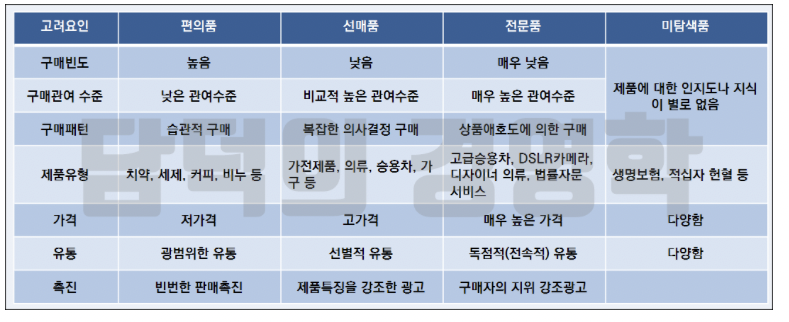

> 편의품: 치약,세제,커피,비누 등 일상제품 위주<br>
> 선매품: 가전제품,의류,승용차,가구 등<br>
> 전문품: 고급승용차,DSLR,디자이너의류 등

In [17]:
prodcl_copy['대중분류'].unique()

array(['생활용품', '채소류', '과일류', '케어용품', '육류', '유제품', '농산물', '건과', '해산물',
       '공산식품', '유아용품', '즉석식품', '건강기능식품', '주류', '기타', '패션잡화', '곡류', '화장품',
       '귀금속', '시계', '위생용품', '헬스케어', '일반의약외품', '알류', '어류', '편집샵', '건어류',
       '기타의류', '여성의류', '수산물', '디자이너', '명품', '남성의류', '우육', '돈육', '조류',
       '생활가전', '기타식품', '스포츠의류', '레져', '여행용품', '계절용품', '연체류', '대형가전',
       '선물세트', '컴퓨터', '악기', '해조류', '가공육', '레스토랑', '주방용품', '서적', '대형가구',
       '침구류', '데일리처분', '감미료', '공병/공박스', '담배', '애완용품', '문구류', '다이소',
       '소형가구', '공구', '종합가구', '교육완구', '시즌행사', '음반', '영상', '여아완구', '게임류',
       '완구류', '자동차용품', 'SPA', '아동의류', '수입브랜드', '스포츠용품', '음향기기', '미입점행사',
       '시즌토탈', '병행수입', '김치류', '욕실용품', '드럭스토어'], dtype=object)

In [26]:
def find_type(x):
    big_cat = {
    '편의품':['가공육','감미료','건강기능식품','건과','건어류','곡류','공산식품','과일류','기타식품',\
          '김치류','농산물','돈육','레스토랑','수산물','알류','어류','연체류','우육','유제품','육류',\
          '조류','주류','즉석식품','채소류','해산물','해조류','계절용품','공구','문구류','생활용품',\
           '애완용품','여아완구','완구류','욕실용품','위생용품','유아용품',\
            '자동차용품','주방용품','침구류','케어용품','헬스케어','화장품','교육완구','서적',\
          '기타의류','남성의류','여성의류','SPA',\
          '공병/공박스','기타','다이소','담배','데일리처분','드럭스토어','미입점행사','병행수입','시즌토탈','시즌행사'],
        
    '선매품':['악기','영상','음반','일반의약외품','게임류','대형가전','생활가전','음향기기','컴퓨터','대형가구',\
           '소형가구','종합가구','레져','스포츠용품','스포츠의류','여행용품','패션잡화','편집샵','선물세트'],
    
    '전문품':['귀금속','명품','시계','디자이너','수입브랜드']
    }

    for i in big_cat.keys():
        if x in big_cat[i]:
            return i

In [27]:
prodcl_copy['TYPE'] = prodcl_copy['대중분류'].apply(lambda x : find_type(x))
prodcl_copy.head()

,대분류코드,중분류코드,소분류코드,제휴사,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE
0,1,101,A010101,A,일용잡화,생활용품,A일용잡화,위생세제,일상용품,편의품
1,1,101,A010102,A,일용잡화,생활용품,A일용잡화,휴지류,일상용품,편의품
2,1,101,A010103,A,일용잡화,생활용품,A일용잡화,뷰티상품,일상용품,편의품
3,1,101,A010104,A,일용잡화,생활용품,A일용잡화,일용잡화,일상용품,편의품
4,1,101,A010105,A,일용잡화,생활용품,A일용잡화,세트상품,일상용품,편의품


In [28]:
prodcl_copy['TYPE'].value_counts()

편의품    3535
선매품     797
전문품      50
Name: TYPE, dtype: int64

In [35]:
import pandas as pd
prodcl_copy.to_pickle('상품분류로직.pkl')
prodcl_copy=pd.read_pickle('상품분류로직.pkl')
prodcl_copy.head()

,대분류코드,중분류코드,소분류코드,제휴사,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE
0,1,101,A010101,A,일용잡화,생활용품,A일용잡화,위생세제,일상용품,편의품
1,1,101,A010102,A,일용잡화,생활용품,A일용잡화,휴지류,일상용품,편의품
2,1,101,A010103,A,일용잡화,생활용품,A일용잡화,뷰티상품,일상용품,편의품
3,1,101,A010104,A,일용잡화,생활용품,A일용잡화,일용잡화,일상용품,편의품
4,1,101,A010105,A,일용잡화,생활용품,A일용잡화,세트상품,일상용품,편의품


In [31]:
# prodcl_copy_=prodcl_copy[['제휴사','대분류','대중분류','중분류명','중분류명_제휴사','TYPE']]
# prodcl_copy_=prodcl_copy_.groupby(['제휴사','대분류','대중분류','중분류명','중분류명_제휴사','TYPE']).sum()
# prodcl_copy_=prodcl_copy_.reset_index()
# prodcl_copy_.head()

### 구매상품TR+상품분류

In [3]:
import pandas as pd
# purprd.to_pickle('purprd.pkl')
purprd=pd.read_pickle('purprd.pkl')

In [41]:
purprd.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120


In [42]:
prodcl_copy.head()

,대분류코드,중분류코드,소분류코드,제휴사,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE
0,1,101,A010101,A,일용잡화,생활용품,A일용잡화,위생세제,일상용품,편의품
1,1,101,A010102,A,일용잡화,생활용품,A일용잡화,휴지류,일상용품,편의품
2,1,101,A010103,A,일용잡화,생활용품,A일용잡화,뷰티상품,일상용품,편의품
3,1,101,A010104,A,일용잡화,생활용품,A일용잡화,일용잡화,일상용품,편의품
4,1,101,A010105,A,일용잡화,생활용품,A일용잡화,세트상품,일상용품,편의품


In [43]:
purprd_prodcl = pd.merge(purprd, prodcl_copy)
# purd = purprd_prodcl.sort_values(by='영수증번호')
#purprd_prodcl

In [45]:
purprd_prodcl = purprd_prodcl.drop(columns=['대분류코드','중분류코드','소분류코드'])
purprd_prodcl.to_pickle('TR_맵핑완료.pkl')
purprd_prodcl=pd.read_pickle('TR_맵핑완료.pkl')
purprd_prodcl.head()

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE
0,B,8664000,17218,44,20140222,20,2420,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
1,B,8664007,11303,44,20140222,13,2400,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
2,B,8919520,13210,48,20150921,19,5250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
3,B,6956422,13823,12,20140813,18,2250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
4,B,6957156,18970,12,20140831,22,4900,탄산음료,공산식품,B탄산음료,사이다,식품,편의품


### 상품분류 로직 만들기

In [47]:
# BtoB : 기업용선물 세트 등 벌크 상품들을 분리하기 위한 컬럼 생성
# purprd_prodcl['BtoB']=0
# purprd_prodcl.head()

In [46]:
purprd_prodcl['대분류'].value_counts()

식품          22055333
일상용품         3717811
패션잡화         1139050
기타상품          703805
의류            411701
전문스포츠/레저      369342
교육/문화용품        92174
디지털/가전         89759
가구/인테리어        12516
의약품/의료기기        1539
Name: 대분류, dtype: int64

In [2]:
import numpy as np

In [50]:
# 대중분류의 평균
purprd_pv_big_mean = pd.pivot_table(data=purprd_prodcl,index=['대중분류'],\
                                values='구매금액',aggfunc=(np.mean))
purprd_pv_big_mean=purprd_pv_big_mean.reset_index()
purprd_pv_big_mean=purprd_pv_big_mean.rename(columns={'구매금액':'대중분류_평균'})
purprd_pv_big_mean

,대중분류,대중분류_평균
0,SPA,28701.827775
1,가공육,6076.364307
2,감미료,6848.121426
3,건강기능식품,101452.902741
4,건과,8962.573453
...,...,...
78,편집샵,176093.740016
79,해산물,18325.462052
80,해조류,4438.357589
81,헬스케어,18190.060093


In [10]:
# # 중분류의 평균
# purprd_pv_mean = pd.pivot_table(data=purprd_prodcl,index=['대분류','대중분류','중분류명_제휴사'],\
#                                 values='구매금액',aggfunc=(np.mean))
# # purprd_pv_max = pd.pivot_table(data=purprd_prodcl,index='대분류',values='구매금액',aggfunc=np.max)
# purprd_pv_mean=purprd_pv_mean.reset_index()
# purprd_pv_mean=purprd_pv_mean.rename(columns={'구매금액':'중분류평균'})

In [51]:
# 소분류의 평균
purprd_pv_small_mean = pd.pivot_table(data=purprd_prodcl,index=['대중분류','중분류명_제휴사','소분류명'],\
                                values='구매금액',aggfunc=(np.mean))
purprd_pv_small_mean=purprd_pv_small_mean.reset_index()
purprd_pv_small_mean=purprd_pv_small_mean.rename(columns={'구매금액':'소분류_평균'})
purprd_pv_small_mean

,대중분류,중분류명_제휴사,소분류명,소분류_평균
0,SPA,B복합샵,SPA,28701.827775
1,가공육,B냉장햄세트,냉장햄세트,112312.500000
2,가공육,B소시지,비엔나소시지,7501.486616
3,가공육,B소시지,일반소시지,2218.172873
4,가공육,B소시지,후랑크소시지,7837.970353
...,...,...,...,...
4292,화장품,D아이메이크업,마스카라,14229.837020
4293,화장품,D아이메이크업,메이크업세트,13042.415459
4294,화장품,D아이메이크업,아이라이너,14868.213962
4295,화장품,D아이메이크업,아이브로우,12020.000000


In [52]:
purprd_pv_mean_=pd.merge(purprd_pv_big_mean,purprd_pv_small_mean,how='outer')
purprd_pv_mean_

,대중분류,대중분류_평균,중분류명_제휴사,소분류명,소분류_평균
0,SPA,28701.827775,B복합샵,SPA,28701.827775
1,가공육,6076.364307,B냉장햄세트,냉장햄세트,112312.500000
2,가공육,6076.364307,B소시지,비엔나소시지,7501.486616
3,가공육,6076.364307,B소시지,일반소시지,2218.172873
4,가공육,6076.364307,B소시지,후랑크소시지,7837.970353
...,...,...,...,...,...
4292,화장품,79303.188941,D아이메이크업,마스카라,14229.837020
4293,화장품,79303.188941,D아이메이크업,메이크업세트,13042.415459
4294,화장품,79303.188941,D아이메이크업,아이라이너,14868.213962
4295,화장품,79303.188941,D아이메이크업,아이브로우,12020.000000


In [54]:
purprd_pv_mean_=purprd_pv_mean_[['대중분류','중분류명_제휴사','소분류명','대중분류_평균','소분류_평균']]
purprd_pv_mean_.head()

,대중분류,중분류명_제휴사,소분류명,대중분류_평균,소분류_평균
0,SPA,B복합샵,SPA,28701.827775,28701.827775
1,가공육,B냉장햄세트,냉장햄세트,6076.364307,112312.500000
2,가공육,B소시지,비엔나소시지,6076.364307,7501.486616
3,가공육,B소시지,일반소시지,6076.364307,2218.172873
4,가공육,B소시지,후랑크소시지,6076.364307,7837.970353


In [55]:
# 고-중-저가 여부의 기준인 파라미터: 상품의 중분류평균치 / 대중분류_평균
purprd_pv_mean_['param'] = purprd_pv_mean_['소분류_평균']/purprd_pv_mean_['대중분류_평균']

In [56]:
purprd_pv_mean_['param'].describe()

count    4297.000000
mean        1.578460
std         4.196592
min         0.009214
25%         0.406489
50%         0.793998
75%         1.328520
max        77.828560
Name: param, dtype: float64

In [57]:
# 기업용선물세트 필터링 ( 조건: param 10배 이상이면서 소분류명 안에 -세트- 인것)
p_set=purprd_pv_mean_[purprd_pv_mean_['param']>10][purprd_pv_mean_[purprd_pv_mean_['param']>10]['소분류명'].str.contains(r'[*세트*]')]
p_set.head()

,대중분류,중분류명_제휴사,소분류명,대중분류_평균,소분류_평균,param
1,가공육,B냉장햄세트,냉장햄세트,6076.364307,112312.500000,18.483503
5,가공육,B수입육선물세트,수입냉동선물세트,6076.364307,143588.636364,23.630683
6,가공육,B수입육선물세트,수입냉장선물세트,6076.364307,144363.636364,23.758226
22,가공육,B햄소시지,햄세트,6076.364307,146491.860465,24.108472
55,감미료,B조미선물세트,식용유세트,6848.121426,77952.727273,11.383082


In [16]:
purprd_prodcl['BtoB']=0

In [574]:
# 기업용 선물 세트를 분리
for i,j,k,l in zip(p_set['중분류명_제휴사'],p_set['소분류명'],p_set['소분류_평균'],p_set['param']):
    purprd_prodcl.loc[(purprd_prodcl.중분류명_제휴사==i) & (purprd_prodcl.소분류명==j)&\
                      (purprd_prodcl.구매금액 > k*10),'BtoB']='기업용_선물세트'

In [17]:
purprd_prodcl[(purprd_prodcl['BtoB']=='기업용_선물세트')]['구매금액'].min()

nan

### 벌크 상품 분류

In [58]:
purprd_prodcl.head()

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE
0,B,8664000,17218,44,20140222,20,2420,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
1,B,8664007,11303,44,20140222,13,2400,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
2,B,8919520,13210,48,20150921,19,5250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
3,B,6956422,13823,12,20140813,18,2250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품
4,B,6957156,18970,12,20140831,22,4900,탄산음료,공산식품,B탄산음료,사이다,식품,편의품


In [59]:
purprd_mean_map=purprd_pv_mean_.drop(columns='param')
purprd_mean_map.head()

,대중분류,중분류명_제휴사,소분류명,대중분류_평균,소분류_평균
0,SPA,B복합샵,SPA,28701.827775,28701.827775
1,가공육,B냉장햄세트,냉장햄세트,6076.364307,112312.500000
2,가공육,B소시지,비엔나소시지,6076.364307,7501.486616
3,가공육,B소시지,일반소시지,6076.364307,2218.172873
4,가공육,B소시지,후랑크소시지,6076.364307,7837.970353


In [60]:
purprd_prodcl_map = pd.merge(purprd_prodcl,purprd_mean_map)
purprd_prodcl_map.head()

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE,대중분류_평균,소분류_평균
0,B,8664000,17218,44,20140222,20,2420,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755
1,B,8664007,11303,44,20140222,13,2400,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755
2,B,8919520,13210,48,20150921,19,5250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755
3,B,6956422,13823,12,20140813,18,2250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755
4,B,6957156,18970,12,20140831,22,4900,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755


In [61]:
purprd_prodcl_map.to_pickle('purprd_prodcl_map.pkl')

In [4]:
purprd_prodcl_map = pd.read_pickle('purprd_prodcl_map.pkl')

In [5]:
purprd_prodcl_map['lev_param']=purprd_prodcl_map['구매금액']/purprd_prodcl_map['소분류_평균']
purprd_prodcl_map['lev_param'].describe()

count    2.859303e+07
mean     1.000000e+00
std      4.071432e+00
min      3.002954e-05
25%      4.897990e-01
50%      7.695717e-01
75%      1.121285e+00
max      3.032000e+03
Name: lev_param, dtype: float64

In [63]:
purprd_prodcl_map[purprd_prodcl_map['구매금액']>10000000]['lev_param'].describe()

count    1838.000000
mean       60.721074
std       165.986480
min         2.007979
25%         4.966509
50%        13.250007
75%        40.989234
max      2194.541105
Name: lev_param, dtype: float64

In [64]:
# purprd_prodcl_map[purprd_prodcl_map['BtoB']=='기업용_선물세트']['구매금액'].min()

In [75]:
purprd_prodcl_map[purprd_prodcl_map['lev_param']>160]['구매금액'].min()

102000

In [68]:
# min 구매금액이 크게 달라지는 lev_param 찾기
for i in range(100,1000,50):
    a=purprd_prodcl_map[purprd_prodcl_map['lev_param']>i]['구매금액'].min()
    print(i,a)


100 15360
150 21600
200 120000
250 150000
300 306600
350 432000
400 432000
450 432000
500 480000
550 528000
600 672000
650 672000
700 672000
750 720000
800 1728000
850 1728000
900 1728000
950 2196000


In [67]:
# purprd_prodcl_map[purprd_prodcl_map['lev_param']>800]['BtoB']='기업용_선물세트'

In [6]:
# 분류 로직 레퍼런스 : 0.5 이하 저가 / 2 초과면 고가 / 사이면 중가
def lev(x):
    if x > 800:
        return '고가'
    elif x > 200:
        return '중가'
    else:
        return '저가'

In [7]:
purprd_prodcl_map['lev'] = purprd_prodcl_map['lev_param'].apply(lev)
purprd_prodcl_map.head()

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE,대중분류_평균,소분류_평균,lev_param,lev
0,B,8664000,17218,44,20140222,20,2420,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755,0.866020,저가
1,B,8664007,11303,44,20140222,13,2400,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755,0.858863,저가
2,B,8919520,13210,48,20150921,19,5250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755,1.878762,저가
3,B,6956422,13823,12,20140813,18,2250,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755,0.805184,저가
4,B,6957156,18970,12,20140831,22,4900,탄산음료,공산식품,B탄산음료,사이다,식품,편의품,7013.446165,2794.392755,1.753512,저가


In [79]:
purprd_prodcl_map['lev'].value_counts()

저가    28591399
중가        1505
고가         126
Name: lev, dtype: int64

In [9]:
1.287547e+06

1287547.0

In [8]:
purprd_prodcl_map[purprd_prodcl_map['lev']=='저가'].sort_values(by='구매금액',ascending=False)

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,중분류명,대중분류,중분류명_제휴사,소분류명,대분류,TYPE,대중분류_평균,소분류_평균,lev_param,lev
21057659,A,1416069,14323,6,20140221,14,101330000,명품,명품,A명품,명품잡화,패션잡화,전문품,861076.666183,1.287547e+06,78.700051,저가
21052803,A,1500785,14323,6,20140307,14,101110000,명품,명품,A명품,명품잡화,패션잡화,전문품,861076.666183,1.287547e+06,78.529183,저가
21062141,A,1677262,14323,6,20140405,16,99960000,명품,명품,A명품,명품잡화,패션잡화,전문품,861076.666183,1.287547e+06,77.636012,저가
28365496,A,4593637,13376,1,20150627,16,87769260,명품,명품,A명품,디자이너,패션잡화,전문품,861076.666183,1.252515e+06,70.074412,저가
20863376,A,4573360,2290,1,20150624,13,74410000,명품,명품,A명품,명품잡화보석,패션잡화,전문품,861076.666183,3.612413e+06,20.598420,저가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110691,B,10640805,15372,120,20151217,22,10,기초화장품,화장품,B기초화장품,일반화장품,일상용품,편의품,79303.188941,1.895844e+04,0.000527,저가
16453114,C,466081,12552,11,20150216,19,10,국산과일,과일류,C국산과일,사과,식품,편의품,7476.170281,7.377979e+03,0.001355,저가
7875086,B,10699136,13476,123,20140606,17,6,화장지,생활용품,B화장지,롤티슈,일상용품,편의품,10970.314416,1.705783e+04,0.000352,저가
11963314,C,10384920,19052,448,20150725,17,2,가정잡화,생활용품,C가정잡화,생활잡화균일가,일상용품,편의품,10970.314416,2.575128e+03,0.000777,저가


<AxesSubplot:xlabel='lev'>

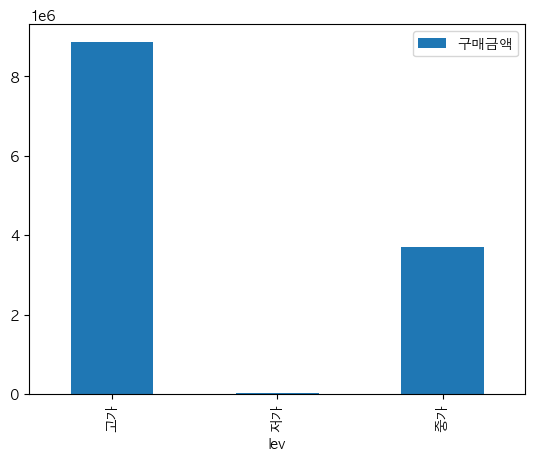

In [84]:
purprd_prodcl_map.pivot_table(index='lev',values=['구매금액'],aggfunc=np.mean).plot(kind='bar')

In [229]:
purprd_cnt=purprd_prodcl['중분류명_제휴사'].value_counts().reset_index().rename(columns={'index':'중분류명_제휴사','중분류명_제휴사':'count'})
purprd_cnt

,중분류명_제휴사,count
0,A가공식품,1260715
1,A농산물,820228
2,A캐주얼,528858
3,C우유,442587
4,B흰우유,437727
...,...,...
754,B홈시어터,1
755,B전자악기,1
756,B온라인규격/간편조리생선,1
757,BDVD,1


In [55]:
# purprd_cnt['대분류'] = purprd_cnt['중분류명_제휴사'].apply(lambda x: find_cat(x[1:]))
# purprd_cnt

In [230]:
# purprd_pv_mean = pd.merge(purprd_cnt,purprd_pv_mean)
# purprd_pv_mean=purprd_pv_mean[['대분류','대중분류','중분류명_제휴사','mean','count','amax']]
# purprd_pv_mean

In [231]:
# purprd_pv_mean['mean'].describe()

In [87]:
# purprd_pv_mean['AVGVS'] = purprd_pv_mean['amax'] / purprd_pv_mean['mean']
# purprd_pv_mean

In [166]:
clf_logic

,CAT,CATEGORY,UPRICE,QTY,AVG,AVGVS,LEV
0,A01가공식품,식품,14650,1260715,7926,1.8,중가
1,A01건강식품,식품,139926,53366,7926,17.7,고가
2,A01기타,멀티샵,96379,649,96379,1.0,중가
3,A01농산물,식품,15090,820228,7926,1.9,중가
4,A01수산품,식품,30602,199657,7926,3.9,고가
...,...,...,...,...,...,...,...
801,D07여성,이미용,48304,400,54507,0.9,중가
802,D08네일메이크업,이미용,10981,824,54507,0.2,저가
803,D08립메이크업,이미용,17839,1925,54507,0.3,저가
804,D08베이스메이크업,이미용,25196,1371,54507,0.5,저가
